In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import norse.torch as snn
from norse.torch.functional import lif

In [2]:
def decoder(input):
    return input.sum(dim=0)

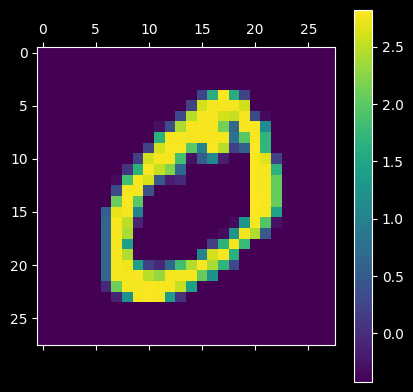

In [3]:
img = torch.load("notebooks/data/img.pt")

plt.matshow(img[0])
plt.colorbar()
plt.show()

torch.Size([32, 1, 28, 28])

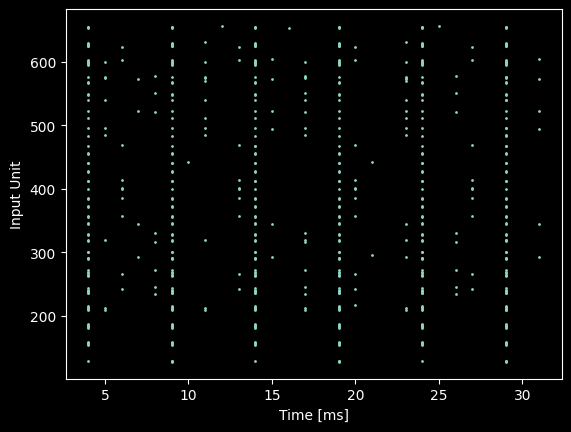

In [4]:
from norse.torch import ConstantCurrentLIFEncoder

T = 32
example_encoder = ConstantCurrentLIFEncoder(T)

example_input = example_encoder(img)
example_spikes = example_input.reshape(T, 28 * 28).to_sparse().coalesce()
t = example_spikes.indices()[0]
n = example_spikes.indices()[1]

plt.scatter(t, n, s=1)
plt.ylabel("Input Unit")
plt.xlabel("Time [ms]")
example_input.shape

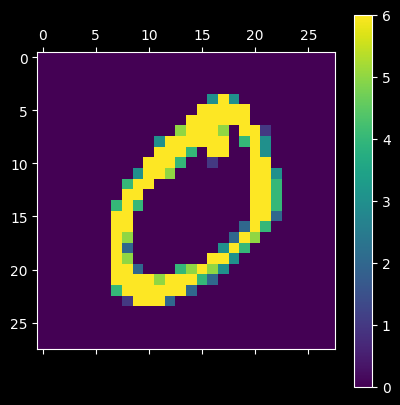

torch.Size([1, 28, 28])

In [5]:
example_decoded = decoder(example_input)

plt.matshow(example_decoded[0])
plt.colorbar()
plt.show()
example_decoded.shape

torch.Size([32, 1, 28, 28])

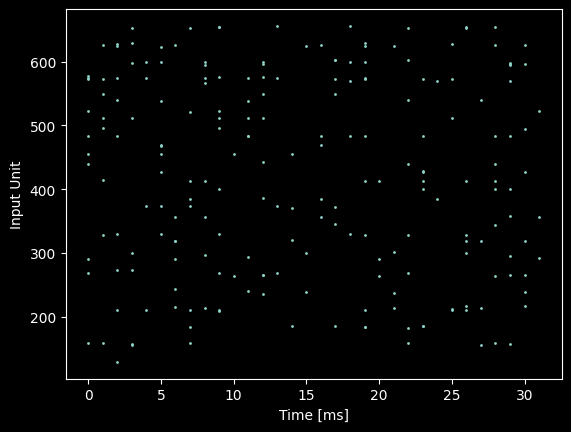

In [6]:
from norse.torch import PoissonEncoder

T = 32
example_encoder = PoissonEncoder(T, f_max=20)

example_input = example_encoder(img)
example_spikes = example_input.reshape(T, 28 * 28).to_sparse().coalesce()
t = example_spikes.indices()[0]
n = example_spikes.indices()[1]

plt.scatter(t, n, s=1)
plt.ylabel("Input Unit")
plt.xlabel("Time [ms]")
example_input.shape

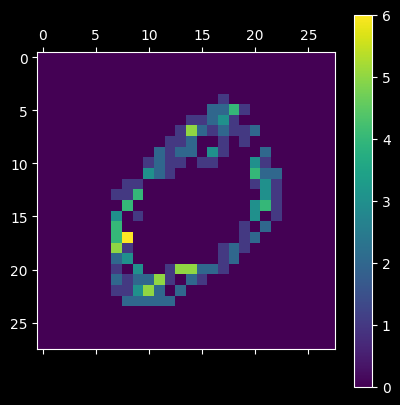

torch.Size([1, 28, 28])

In [7]:
example_decoded = decoder(example_input)

plt.matshow(example_decoded[0])
plt.colorbar()
plt.show()
example_decoded.shape

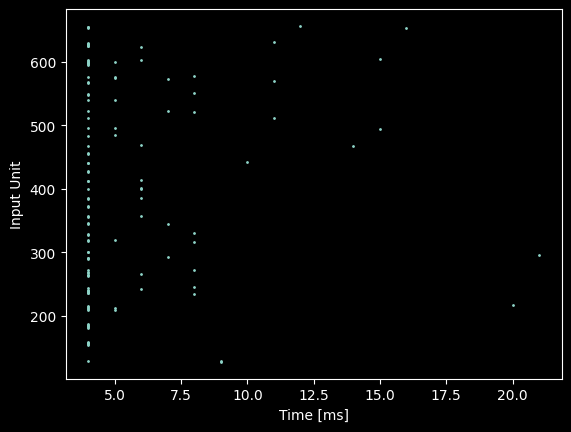

In [8]:
from norse.torch import SpikeLatencyLIFEncoder

T = 32
example_encoder = SpikeLatencyLIFEncoder(T)

example_input = example_encoder(img)
example_spikes = example_input.reshape(T, 28 * 28).to_sparse().coalesce()
t = example_spikes.indices()[0]
n = example_spikes.indices()[1]

plt.scatter(t, n, s=1)
plt.ylabel("Input Unit")
plt.xlabel("Time [ms]")
plt.show()

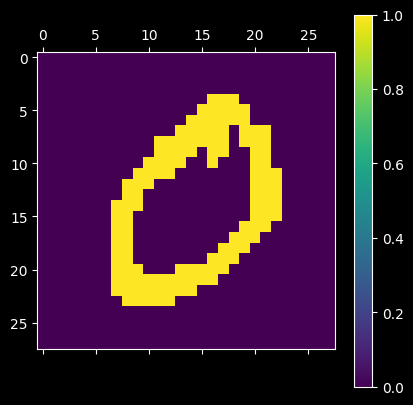

torch.Size([1, 28, 28])

In [9]:
example_decoded = decoder(example_input)

plt.matshow(example_decoded[0])
plt.colorbar()
plt.show()
example_decoded.shape

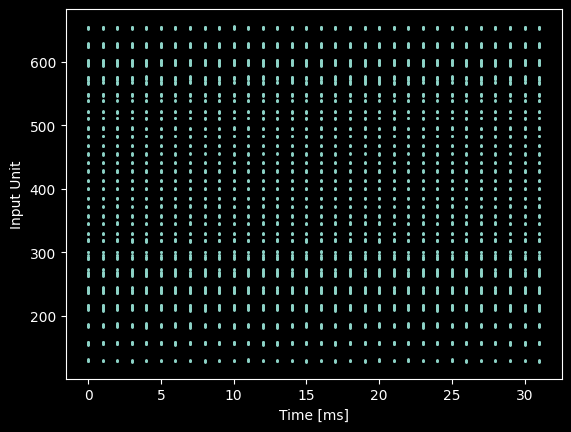

In [10]:
from norse.torch.module.encode import PoissonEncoderStep

T = 32
example_encoder = PoissonEncoderStep()

example_input = torch.stack([example_encoder(img) for _ in range(T)])
example_spikes = example_input.reshape(T, 28 * 28).to_sparse().coalesce()
t = example_spikes.indices()[0]
n = example_spikes.indices()[1]

plt.scatter(t, n, s=1)
plt.ylabel("Input Unit")
plt.xlabel("Time [ms]")
plt.show()

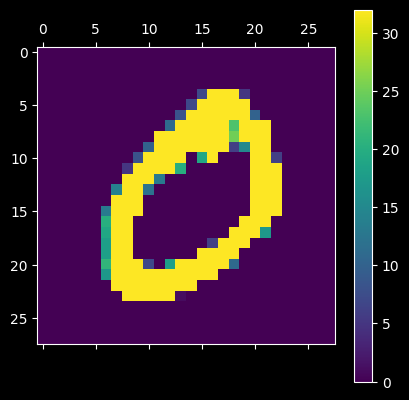

torch.Size([1, 28, 28])

In [11]:
example_decoded = decoder(example_input)

plt.matshow(example_decoded[0])
plt.colorbar()
plt.show()
example_decoded.shape